#UAS BIG DATA MINING
Nama : Alvin Christ Yudantama <br>
Nim : 22.11.4613 <br>
Kelas : BDDM 8

# Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

# Load dataset
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/BigDataMining/UAS/Disease_symptom_and_patient_profile_dataset.csv"
dataset = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Preprocessing: Map categorical values to numeric
binary_mapping = {'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0}
binary_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Outcome Variable']
for col in binary_columns:
    dataset[col] = dataset[col].map(binary_mapping)

gender_mapping = {'Male': 1, 'Female': 0}
dataset['Gender'] = dataset['Gender'].map(gender_mapping)

bp_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
cholesterol_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
dataset['Blood Pressure'] = dataset['Blood Pressure'].map(bp_mapping)
dataset['Cholesterol Level'] = dataset['Cholesterol Level'].map(cholesterol_mapping)

# Check for duplicates
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Class imbalance check
class_distribution = dataset['Outcome Variable'].value_counts(normalize=True)
print("\nClass Distribution (Outcome Variable):")
print(class_distribution)

Number of duplicate rows: 49

Class Distribution (Outcome Variable):
Outcome Variable
1    0.532951
0    0.467049
Name: proportion, dtype: float64


In [ ]:
# Menghapus duplikasi
dataset_cleaned = dataset.drop_duplicates()

# Mengecek jumlah baris setelah duplikasi dihapus
print(f"Jumlah baris setelah menghapus duplikasi: {len(dataset_cleaned)}")

Jumlah baris setelah menghapus duplikasi: 300


In [ ]:
dataset.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,0,1,1
1,Common Cold,0,1,1,0,25,0,1,1,0
2,Eczema,0,1,1,0,25,0,1,1,0
3,Asthma,1,1,0,1,25,1,1,1,1
4,Asthma,1,1,0,1,25,1,1,1,1


# Feature Selection

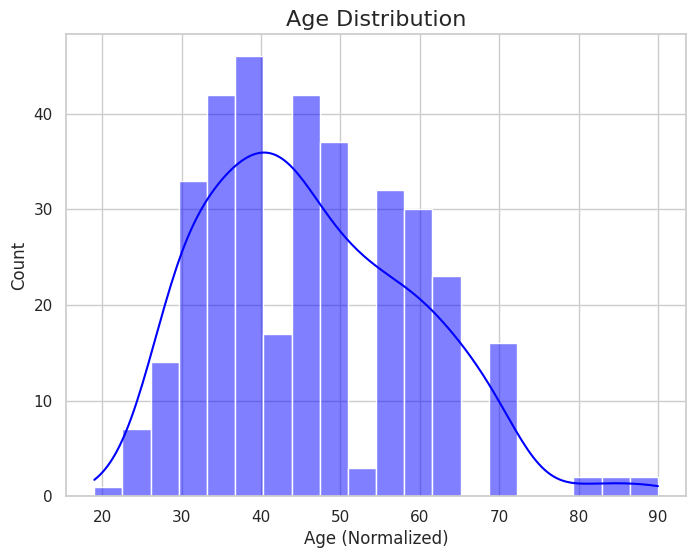

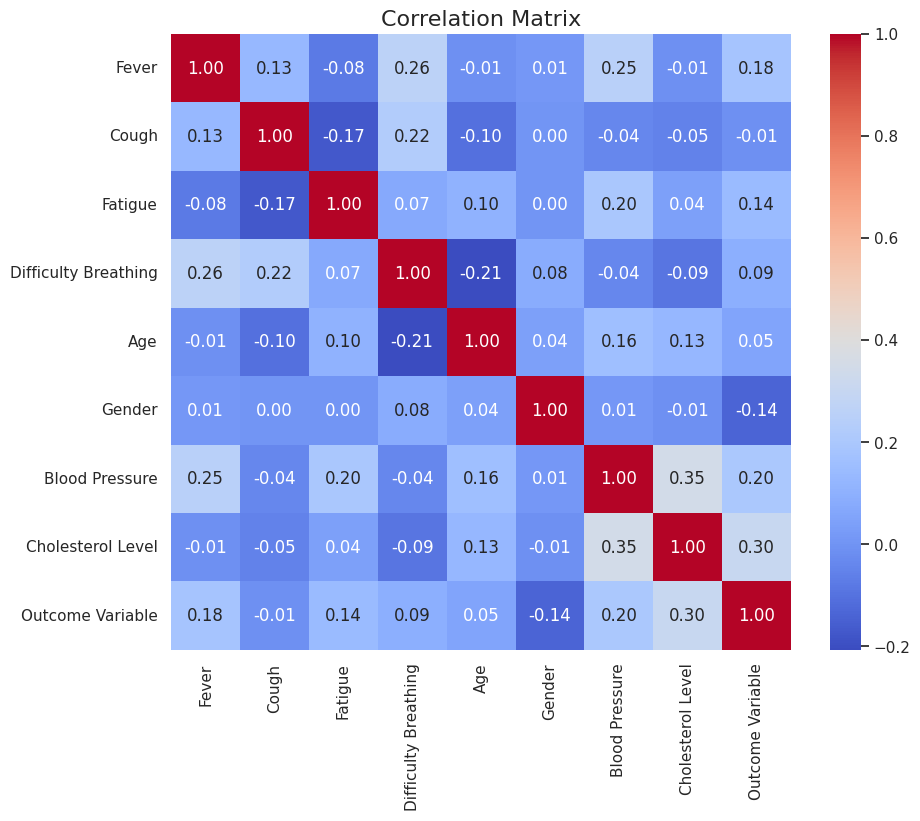

<ipython-input-5-df4036606c36>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome Variable', data=dataset, palette='pastel')


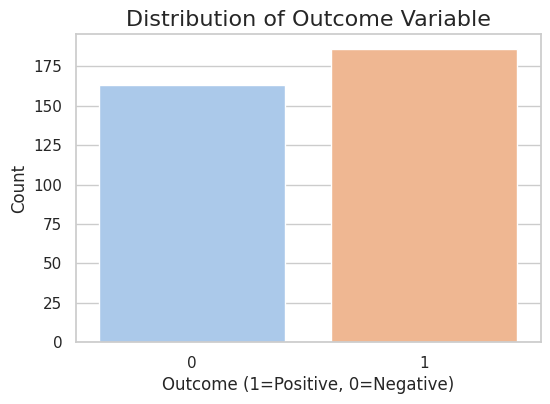

<ipython-input-5-df4036606c36>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


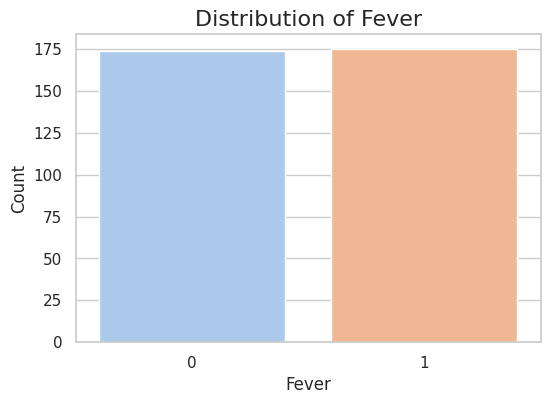

<ipython-input-5-df4036606c36>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


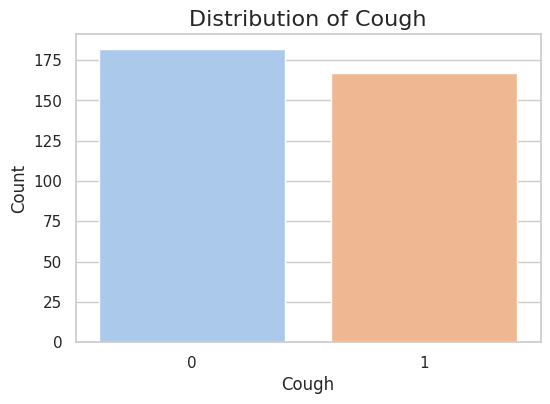

<ipython-input-5-df4036606c36>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


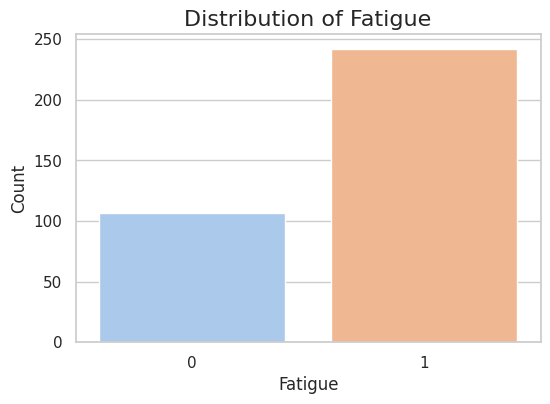

<ipython-input-5-df4036606c36>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


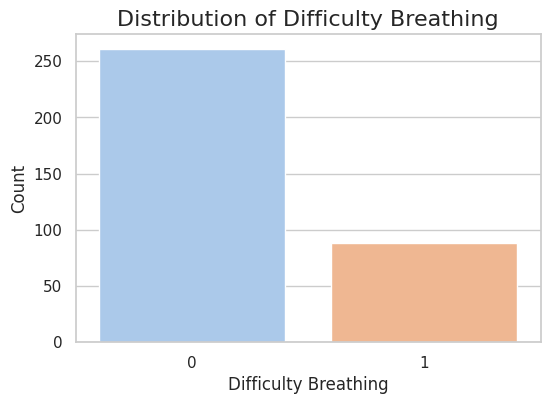

<ipython-input-5-df4036606c36>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


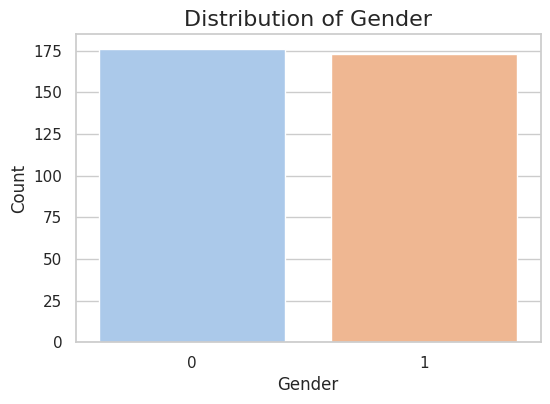

<ipython-input-5-df4036606c36>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


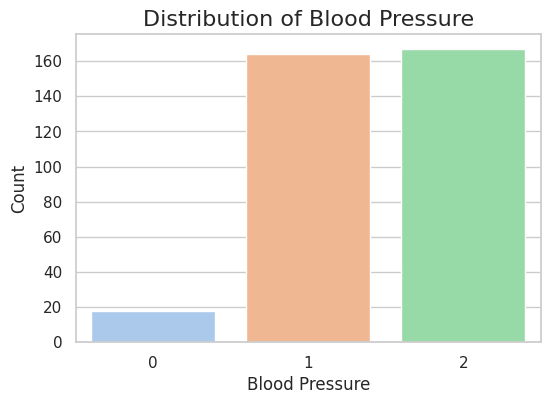

<ipython-input-5-df4036606c36>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


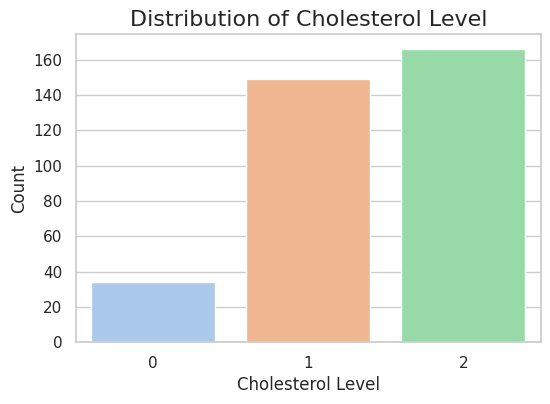

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age'], kde=True, bins=20, color="blue")
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age (Normalized)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
print(" ")

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.drop(columns=["Disease"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()
print(" ")

# Count plot for Outcome Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome Variable', data=dataset, palette='pastel')
plt.title('Distribution of Outcome Variable', fontsize=16)
plt.xlabel('Outcome (1=Positive, 0=Negative)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
print(" ")

# Visualizing categorical features
categorical_features = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=dataset, palette='pastel')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()
    print(" ")

# Data Modeling - Decision Tree & Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Pisahkan fitur dan target
X = dataset_cleaned.drop(columns=["Outcome Variable", "Disease"])
y = dataset_cleaned["Outcome Variable"]

# Split dataset ke training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluasi Model
print("Decision Tree Performance:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65        27
           1       0.71      0.76      0.74        33

    accuracy                           0.70        60
   macro avg       0.70      0.69      0.69        60
weighted avg       0.70      0.70      0.70        60

Accuracy: 0.7
Confusion Matrix:
[[17 10]
 [ 8 25]]

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.68      0.76      0.71        33

    accuracy                           0.67        60
   macro avg       0.66      0.66      0.66        60
weighted avg       0.67      0.67      0.66        60

Accuracy: 0.6666666666666666
Confusion Matrix:
[[15 12]
 [ 8 25]]


# Model Evaluasi - Membuat Model Baru (XGBoost)

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Split data (assuming X and y are already prepared from previous steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("XGBoost Performance:")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

XGBoost Performance:
Accuracy: 0.6833333333333333
Confusion Matrix:
[[16 11]
 [ 8 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.59      0.63        27
           1       0.69      0.76      0.72        33

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:51:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
